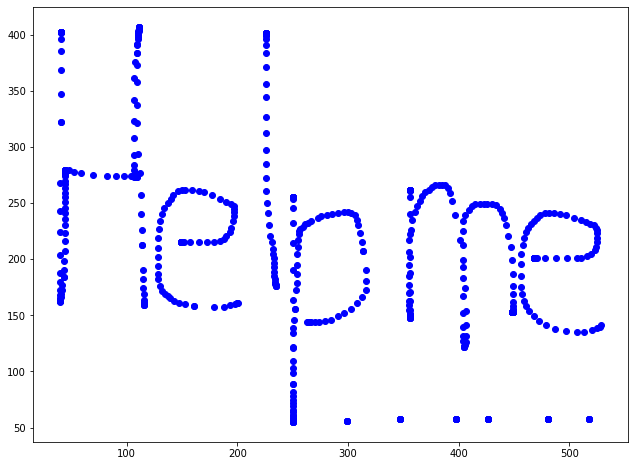

In [5]:
import pygame
import matplotlib.pyplot as plt
import numpy as np

points = np.empty((0,2), dtype='f')

c_radius = 2
c_color = (0,255,255)
c_thickness = 0 

bg_color = (255,255,255)
(width,height) = (640,480)
screen = pygame.display.set_mode((width,height))

is_running = True
is_pushing = False
while is_running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            is_running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            is_pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            is_pushing = False
            
    if is_pushing:
        (x, y) = pygame.mouse.get_pos()
        coord = [x, y]
        global points
        points = np.append(points, [coord], axis=0)
            
    screen.fill(bg_color)
    for point in points:
        pygame.draw.circle(screen,c_color,(int(point[0]),int(point[1])),c_radius,c_thickness)
    pygame.display.flip()   
pygame.quit()

scale = 1 / 60

fig = plt.figure(figsize=(width * scale,height * scale))

max_el1 = max(points[:,1])

for i in range(len(points[:,1])):
    points[:,1][i] = -points[:,1][i]

max_el2 = max(points[:,1])

delta = max_el1 - max_el2

for i in range(len(points[:,1])):
     points[:,1][i] = points[:,1][i] + delta

plt.scatter(points[:,0],points[:,1],c="blue")

plt.show()